In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/sonar.all-data.csv')

Let's look at the distribution of the label to determine the metric that will be used for hyperparameter tuning and evaluate the performance of the final model

<AxesSubplot:xlabel='Label', ylabel='count'>

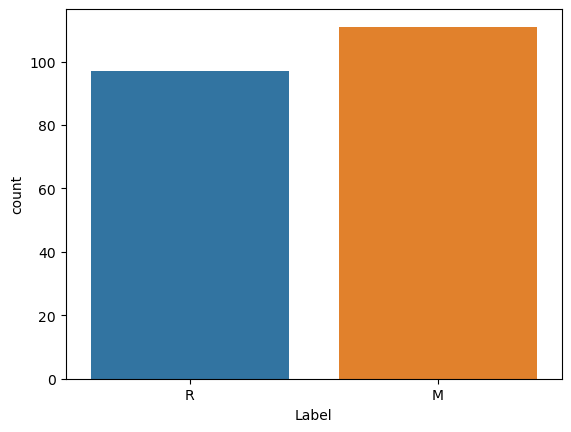

In [3]:
sns.countplot(data, x = 'Label')

We have seen that the labels are relatively balanced, so we can use accuracy to tune the hyperparameters and evaluate the performance of the final model

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [5]:
knn_clf = KNeighborsClassifier()
sc = StandardScaler()

In [6]:
X = data.drop('Label', axis = 1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Let's determine the best hyperparameter (in this we are working only with the n_neighbors hyperparameter) in two different ways: Using the elbow method and using grid search

In [7]:
clf_pipe = Pipeline([('scaler',sc),('model',knn_clf)])
param_grid = {'model__n_neighbors':list(np.arange(1,30,1))}
grid_search = GridSearchCV(clf_pipe, param_grid = param_grid, cv = 5, scoring = 'accuracy',refit = 'accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29]},
             refit='accuracy', scoring='accuracy')

In [8]:
grid_search.best_params_

{'model__n_neighbors': 1}

In [9]:
knn_tunned = KNeighborsClassifier(1)
knn_tunned.fit(X_train,y_train)
preds = knn_tunned.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In this case, the better value for n_neighbors was 1. So it is enough just one neighbor to classify the data (maybe because they are very well separated). Now, let's use the elbow method.

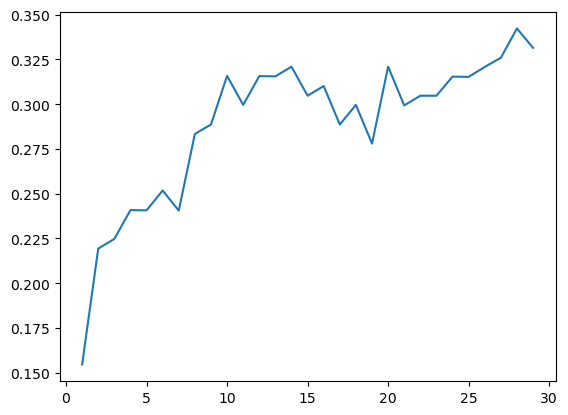

In [15]:
results_df = pd.DataFrame(grid_search.cv_results_)
plt.plot(results_df['param_model__n_neighbors'],1-results_df['mean_test_score'])

From the plot above, we can notice that the hyperparameter value which provides the lower error is one